## Advanced Regression Assignment
### Surprise Housing - Prospective Properties in Austrailian Market

### Approach
- EDA
    - Clean Data
    - Fix NA values
- Data Preparation
    - Creation of dummy variables
- Create train and test data
    - Create train and test data
    - Scale Data
- Build Model
    - Use Grid Search CV
    - Use Ridge and Lasso regression
    - Check best hyper-parameter value
    - Check R2 values and coefficients
    - Conclude on the mode

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### DATA CLEANING
- Remove unwanted variables
- Fix NA values

In [5]:
### Let's drop Id variable as it is not required
data = data.drop('Id',axis=1)

### FIX NA VALUES - 1
#### Fix the missing values, where as per dictionary it should actually say that certain facility is not available
#### Below are the variable for which in dictionary we have NA listed as option saying particular feature is not available
Alley
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature 

In [6]:
nofacilitycolumns = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [7]:
for c in nofacilitycolumns:
    data[c] = data[c].apply(lambda x : 'Na' if x != x else x)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### FIX NA VALUES - 2
#### For the remaining variables with NA values, there are no variables which have more than 5% of NA values
#### Now we will move ahead with value imputation for variables


In [9]:
data[['LotFrontage','MasVnrType','MasVnrArea','Electrical','GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
 4   GarageYrBlt  1379 non-null   float64
dtypes: float64(3), object(2)
memory usage: 57.2+ KB


<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

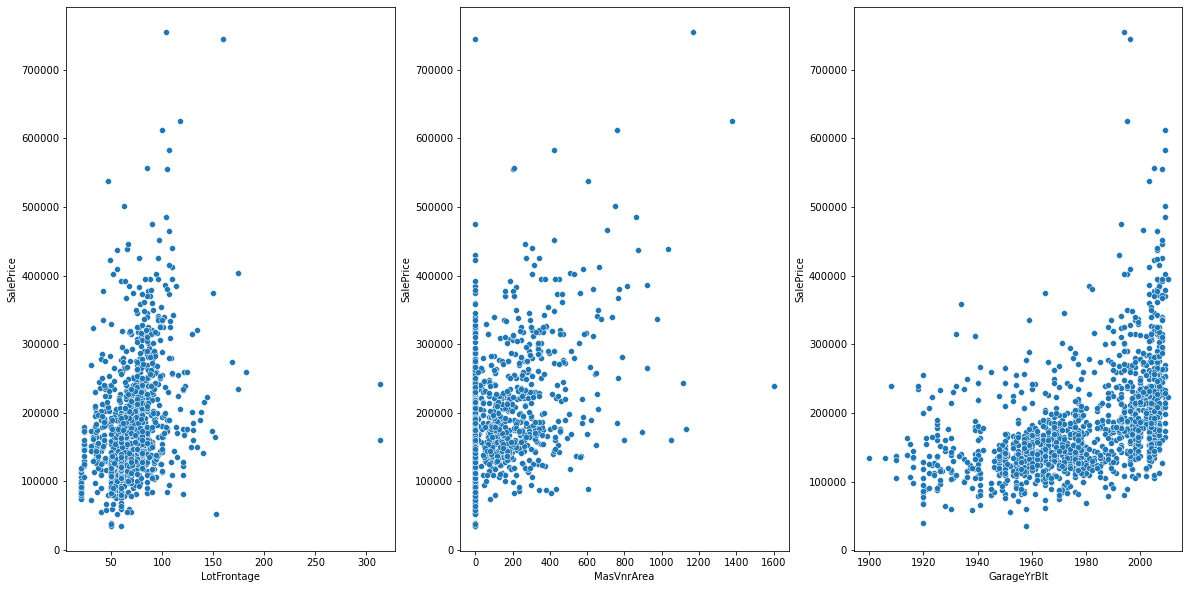

In [10]:
fig, axes = plt.subplots(1, 3,figsize=(20,10))
sns.scatterplot(data=data,x='LotFrontage',y='SalePrice',ax=axes[0])
sns.scatterplot(data=data,x='MasVnrArea',y='SalePrice',ax=axes[1])
sns.scatterplot(data=data,x='GarageYrBlt',y='SalePrice',ax=axes[2])

<AxesSubplot:xlabel='GarageYrBlt'>

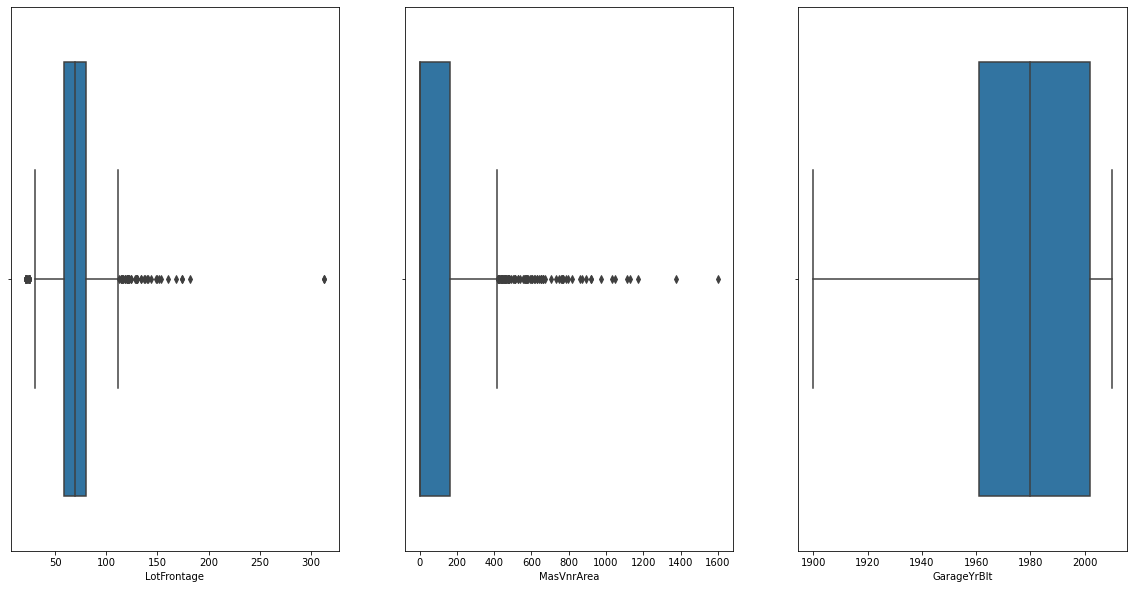

In [11]:
fig, axes = plt.subplots(1, 3,figsize=(20,10))
sns.boxplot(data=data,x='LotFrontage',ax=axes[0])
sns.boxplot(data=data,x='MasVnrArea',ax=axes[1])
sns.boxplot(data=data,x='GarageYrBlt',ax=axes[2])

#### Note : For LotFrontage, MasVnrArea and GarageYrBlt we will use median imputation and for categorical variables we will use Mode imputation

In [12]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median()) 
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median()) 
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median()) 
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0]) 
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0]) 

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

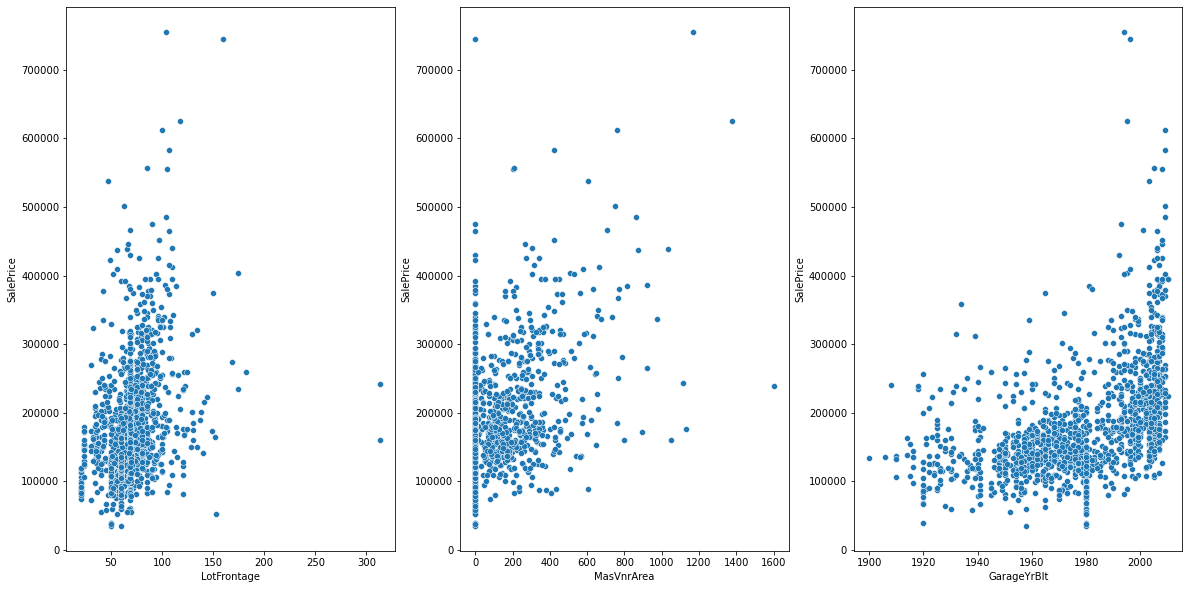

In [13]:
fig, axes = plt.subplots(1, 3,figsize=(20,10))
sns.scatterplot(data=data,x='LotFrontage',y='SalePrice',ax=axes[0])
sns.scatterplot(data=data,x='MasVnrArea',y='SalePrice',ax=axes[1])
sns.scatterplot(data=data,x='GarageYrBlt',y='SalePrice',ax=axes[2])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Now, will correct data which appears to be numeric but is categorical in nature, we will not update the values for below variables 
MSSubClass OverallQual OverallCond

In [15]:
def appendUnderscore(x):
    return '_' + str(x)

data['MSSubClass'] = data['MSSubClass'].apply(lambda x : appendUnderscore(x))
data['OverallQual'] = data['OverallQual'].apply(lambda x : appendUnderscore(x))
data['OverallCond'] = data['OverallCond'].apply(lambda x : appendUnderscore(x))

In [16]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,_60,RL,65.0,8450,Pave,Na,Reg,Lvl,AllPub,Inside,...,0,Na,Na,Na,0,2,2008,WD,Normal,208500
1,_20,RL,80.0,9600,Pave,Na,Reg,Lvl,AllPub,FR2,...,0,Na,Na,Na,0,5,2007,WD,Normal,181500
2,_60,RL,68.0,11250,Pave,Na,IR1,Lvl,AllPub,Inside,...,0,Na,Na,Na,0,9,2008,WD,Normal,223500
3,_70,RL,60.0,9550,Pave,Na,IR1,Lvl,AllPub,Corner,...,0,Na,Na,Na,0,2,2006,WD,Abnorml,140000
4,_60,RL,84.0,14260,Pave,Na,IR1,Lvl,AllPub,FR2,...,0,Na,Na,Na,0,12,2008,WD,Normal,250000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [18]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,_60,RL,65.0,8450,Pave,Na,Reg,Lvl,AllPub,Inside,...,0,Na,Na,Na,0,2,2008,WD,Normal,208500
1,_20,RL,80.0,9600,Pave,Na,Reg,Lvl,AllPub,FR2,...,0,Na,Na,Na,0,5,2007,WD,Normal,181500
2,_60,RL,68.0,11250,Pave,Na,IR1,Lvl,AllPub,Inside,...,0,Na,Na,Na,0,9,2008,WD,Normal,223500
3,_70,RL,60.0,9550,Pave,Na,IR1,Lvl,AllPub,Corner,...,0,Na,Na,Na,0,2,2006,WD,Abnorml,140000
4,_60,RL,84.0,14260,Pave,Na,IR1,Lvl,AllPub,FR2,...,0,Na,Na,Na,0,12,2008,WD,Normal,250000


### Data Preparation
#### Create Dummy Variables for Categorical Features

In [19]:
categorical_vars = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [20]:
for v in categorical_vars:
    dummyVar = pd.get_dummies(data[v],drop_first=True,prefix=v)
    data = pd.concat([data,dummyVar], axis=1)

In [21]:
data.drop(categorical_vars, axis = 1, inplace = True)

In [22]:
data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


### Create Train and Test Split

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [24]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
scaler = MinMaxScaler()

In [26]:
scale_vars = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

In [27]:
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [28]:
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.384058,0.000000,0.00,0.082920,0.0,0.169521,0.141408,0.113889,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.876812,0.716667,0.16,0.174876,0.0,0.154110,0.220458,0.231481,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.528986,0.000000,0.00,0.016655,0.0,0.274401,0.120295,0.098611,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.275362,0.883333,0.00,0.000000,0.0,0.207620,0.079378,0.145602,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.094203,0.000000,0.00,0.000000,0.0,0.332620,0.127169,0.202315,...,0,0,0,0,1,0,0,0,1,0


### Build a model
- Build a Ridge and Lasso regression model
- Use GridSearchCV with range of hyperparameter value to get best value

In [29]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [30]:
df_test[scale_vars] = scaler.transform(df_test[scale_vars])
y_test = df_test.pop('SalePrice')
X_test = df_test

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

### Setting up parameter range

In [32]:
# This set of parameters have been decided after running few iterations with different set of parameters

params = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}

### Ridge Regression

In [33]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [34]:
print(model_cv.best_params_)

{'alpha': 0.1}


In [35]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.79441241e-02  1.43214561e-01  7.02759100e-02  8.25482523e-03
  3.42292786e-02  1.24487732e-01  3.17186920e-02  1.46272314e-02
  1.28237532e-01  1.60266479e-01  1.34925768e-01 -1.80566572e-02
  1.84795104e-01  1.48383198e-02 -1.27807168e-03  1.42154860e-02
 -5.68129004e-03 -1.59243464e-02 -3.74236798e-02 -3.92580809e-03
  9.16959116e-03  6.72483733e-04  3.47080246e-02  1.19941129e-02
  6.87981308e-03  1.59934931e-02  6.11692527e-03  2.94645396e-02
  1.27365605e-02  9.55194095e-02  1.17830426e-02 -4.22832628e-03
 -2.02197086e-03  7.28521185e-04 -3.63018686e-03 -5.89494198e-03
  7.69950231e-03  9.24188449e-03 -6.72817571e-04 -2.16747228e-02
  5.72951421e-03  9.60586801e-03  1.25293796e-02 -1.65863954e-02
  2.70108890e-03 -4.54275922e-03 -5.50258358e-03  4.45060095e-02
  4.88162310e-02  4.90802140e-02  4.48325049e-02  2.39762427e-02
 -1.89336248e-04  1.24123077e-03  4.86022750e-03  2.72981807e-03
  1.03110640e-03  2.39010093e-03 -2.50651170e-04  9.15795549e-03
 -2.82448484e-02  1.19409

In [36]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [37]:
metric1 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9548453378695962
0.652312185395532
0.5556294025000106
1.8899687987442626
0.0005442011777669056
0.0043149972574069925


### LASSO Regression

In [38]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [40]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [41]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.23865576e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.17419531e-02, -0.00000000e+00,
        2.38334154e-01,  0.00000000e+00,  0.00000000e+00,  9.57896104e-03,
        4.23770350e-03,  0.00000000e+00, -0.00000000e+00,  6.62688065e-03,
        0.00000000e+00,  0.00000000e+00,  6.35168699e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.62493357e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.16320928e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.11601128e-03, -7.10033735e-03,  0.00000000e+00,
        0.00000000e+00,  

In [42]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [43]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8304775225000983
0.8142581440597112
2.0859789098094117
1.0096595209911228
0.0020430743484910986
0.0023051587237240246


### Comparing R2 and other values of Ridge and Lasso Regression

In [44]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.954845,0.830478
1,R2 Score (Test),0.652312,0.814258
2,RSS (Train),0.555629,2.085979
3,RSS (Test),1.889969,1.009660
4,MSE (Train),0.023328,0.045200
5,MSE (Test),0.065689,0.048012


### Checking Coefficients

In [45]:
coeff = pd.DataFrame(index=X_train.columns)
coeff.rows = X_train.columns
coeff['Ridge'] = ridge.coef_
coeff['Lasso'] = lasso.coef_

In [46]:
pd.set_option('display.max_rows', None)
coeff

,Ridge,Lasso
LotFrontage,0.017944,0.000000
LotArea,0.143215,0.000000
YearBuilt,0.070276,0.000000
YearRemodAdd,0.008255,0.022387
MasVnrArea,0.034229,0.000000
BsmtFinSF1,0.124488,0.000000
BsmtFinSF2,0.031719,0.000000
BsmtUnfSF,0.014627,0.000000
TotalBsmtSF,0.128238,0.000000
1stFlrSF,0.160266,0.000000
